## The effect of standardization on PCA 

Let us see how the standardization affects PCA and a following supervised classification on the **Wine dataset**.


### Reading in the dataset

In [1]:
import pandas as pd

df = pd.io.parsers.read_csv('./Datasets/wine.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Dividing the dataset into a separate training and test dataset

In this step, we will randomly divide the wine dataset into a training dataset and a test dataset where the training dataset will contain 70% of the samples and the test dataset will contain 30%, respectively.

In [2]:
from sklearn.cross_validation import train_test_split

X = df.values[:,1:]
y = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.30, random_state=12345)

### Training Naive Bayes Classifier on Original Dataset Without applying PCA

In [3]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
model = GaussianNB()
fit = model.fit(X_train, y_train)


### Evaluating Performance

In [4]:
from sklearn import metrics

pred_y_train = model.predict(X_train)

print('\nPrediction accuracy for the training dataset without PCA ')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_y_train)))

pred_y_test = model.predict(X_test)

print('\nPrediction accuracy for the test dataset without PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_y_test)))


Prediction accuracy for the training dataset without PCA 
98.39%

Prediction accuracy for the test dataset without PCA
98.15%



### Feature Scaling - Standardization

In [5]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

### Training Naive Bayes Classifier on Std. Dataset Without applying PCA

In [6]:
# on standardized data
model = GaussianNB()
model.fit(X_train_std, y_train)

GaussianNB()

### Evaluating Performance 

In [7]:
pred_y_train_std = model.predict(X_train_std)

print('\nPrediction accuracy for the Std training dataset without PCA ')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_y_train_std)))

pred_y_test_std = model.predict(X_test_std)

print('\nPrediction accuracy for the Std test dataset without PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_y_test_std)))


Prediction accuracy for the Std training dataset without PCA 
98.39%

Prediction accuracy for the Std test dataset without PCA
98.15%



### Dimensionality reduction via Principal Component Analysis (PCA)

Now, we perform a PCA on the standardized and the non-standardized datasets to transform the dataset onto a 2-dimensional feature subspace.  
In a real application, a procedure like cross-validation would be done in order to find out what choice of features would yield a optimal balance between "preserving information" and "overfitting" for different classifiers. However, we will omit this step since we don't want to train a perfect classifier here, but merely compare the effects of standardization.

In [8]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


# om standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

Let us quickly visualize how our new feature subspace looks like (note that class labels are not considered in a PCA - in contrast to a Linear Discriminant Analysis - but I will add them in the plot for clarity).

In [9]:
%matplotlib inline

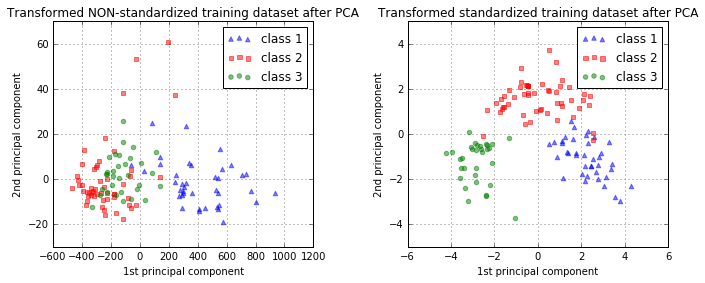

In [10]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    
    
for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  

<br>
<br>

In [11]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train_std, y_train)

<br>
<br>

### Evaluating the classification accuracy with and without standardization with PCA

In [14]:
# on standardized data
model = GaussianNB()
model.fit(X_train, y_train)


pred_y_train = model.predict(X_train)

print('\nPrediction accuracy for training with PCA without std ')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_y_train)))

pred_y_test = model.predict(X_test)

print('\nPrediction accuracy for test with PCA without std')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_y_test)))


Prediction accuracy for training with PCA without std 
81.45%

Prediction accuracy for test with PCA without std
64.81%



In [15]:
# on standardized data
model = GaussianNB()
model.fit(X_train_std, y_train)


pred_y_train_std = model.predict(X_train_std)

print('\nPrediction accuracy for the Std training dataset with PCA ')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_y_train_std)))

pred_y_test_std = model.predict(X_test_std)

print('\nPrediction accuracy for the Std test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_y_test_std)))


Prediction accuracy for the Std training dataset with PCA 
96.77%

Prediction accuracy for the Std test dataset with PCA
98.15%

